# Random Graphs

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #NetworkX has some deprecation warnings

## Introduction

A **graph** $G=(V,E)$ is a collection of vertices $V$ and edges $E$ between the vertices in $V$. Graphs often model interactions such as social networks, a network of computers, links on webpages, or pixels in a image. The set of vertices $V$ often represents a set of objects such as people, computers, and cats. Meanwhile the set of edges $E$ consists of vertex pairs, and usually, vertex pairs encode a relationship between objects. If graph $G$ represents a social network, the vertices could represent people, and the existence of an edge between two people could represent whether they mutually know each other. In fact, there are two types of edges: directed and undirected. An undirected edge represents mutual relation such as friendship in a social network, and a directed edge represents relation that is directional. For example, you have a crush on someone, but they don't have a crush on you. In short, a graph models pairwise relations/interaction(edges) between objects(vertices).

A **random graph** is a graph whose construction is a result of an underlying random process or distribution over a set of graphs. Random graph can help us model or infer properties of other graphs whose construction is random or appears to be random. Examples of random graphs may include the graph of the internet and a social network. The simplest model is the $G(n,p)$ model ,and it is due to Erdős and Rényi and independently Gilbert [1,2].

# The $G(n,p)$ model

The $G(n,p)$ model consist of two parameters where $n$ is the number of vertices, and $p$ is the probability of forming an undirected edge between vertices. During the construction of a random graph, one visits each vertex with probability $p$ one adds an edge. Examples of realization for different parameters are shown below:

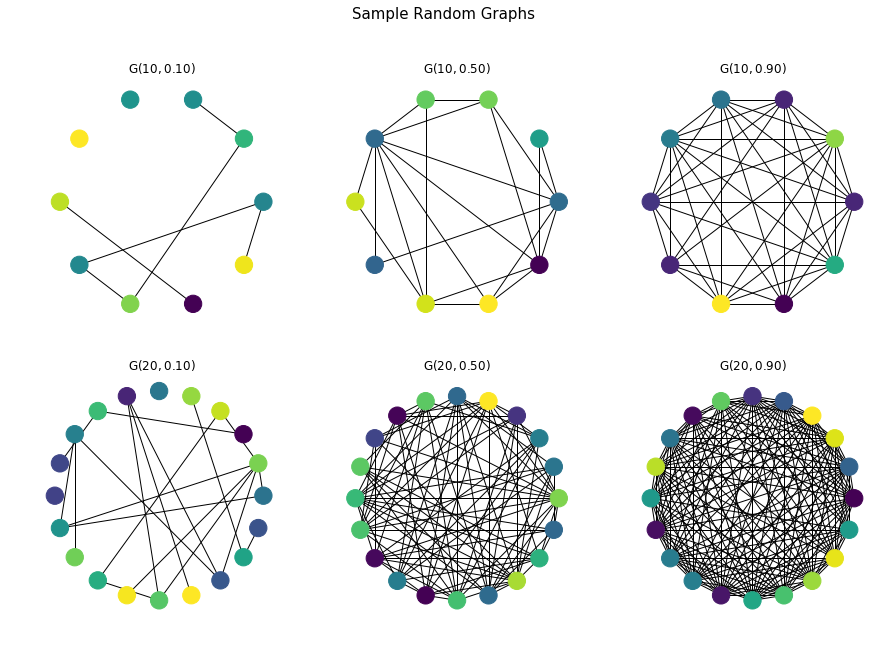

In [36]:
params = [(10,0.1),(10,.5),(10,0.9),(20,0.1),(20,.5),(20,0.9)]

plt.figure(figsize=(15,10))
idx = 1
for (n,p) in params:
    G = nx.gnp_random_graph(n,p)
    
    vertex_colors = np.random.rand(n)
    
    plt.subplot(2,3,idx)
    nx.draw_circular(G,node_color = vertex_colors)
    plt.title("G$(%d,%.2f)$" %(n,p))    
    idx+=1
plt.suptitle('Sample Random Graphs',fontsize=15)
plt.show()

# Basic Properties

# Phase Transitions

Random graphs undergo a phase transition for certain properties suchs connectedness. For a random graph, there exist a $p(n)$ for all $p > p(n)$ and a fixed $n$ for which there are no isolated vertices with high probability.

It can be shown that for $$p(n) = \frac{\log n}{n}$$ the probability of isolated components goes to zero[6].

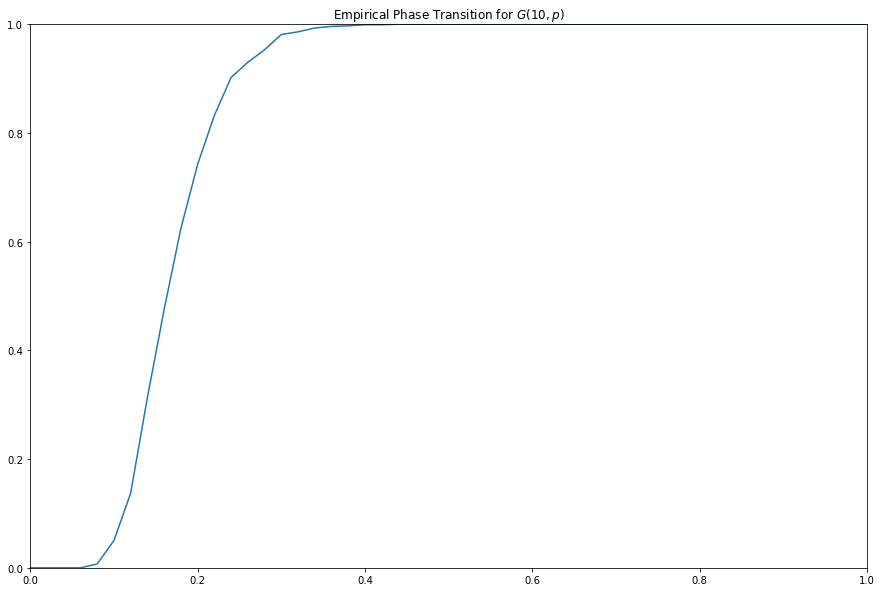

In [18]:
num_samples = 1000
n = 20
num_steps = 51

p = np.linspace(0,1,num_steps)
prob_connected = np.zeros(num_steps)

for i in range(num_steps):
    for j in range(num_samples):
        G = nx.gnp_random_graph(n,p[i])
        num_connected = nx.number_connected_components(G)
        
        isFully_connected = float(num_connected==1)
        
        prob_connected[i] = prob_connected[i] + (isFully_connected - prob_connected[i])/(j+1)
        
        
plt.figure(figsize=(15,10))
plt.plot(p,prob_connected)
plt.title('Empirical Phase Transition for $G(10,p)$')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# It's a Small World

In a fully connected random graph, the diameter of the graph becomes extremely small relative to the number vertices. The diameter is the longest shortest path between two nodes. The small world phenomenon was observed in social networks in Milgram's Small World Experiment[3]. Milgram's experiments are commonly refered in popular culture as the six degrees of seperation. The example below shows a Facebook social network from the SNAP dataset: 

In [ ]:
G = nx.read_edgelist('facebook_combined.txt')
d = nx.diameter(G)
n = len(G.nodes())

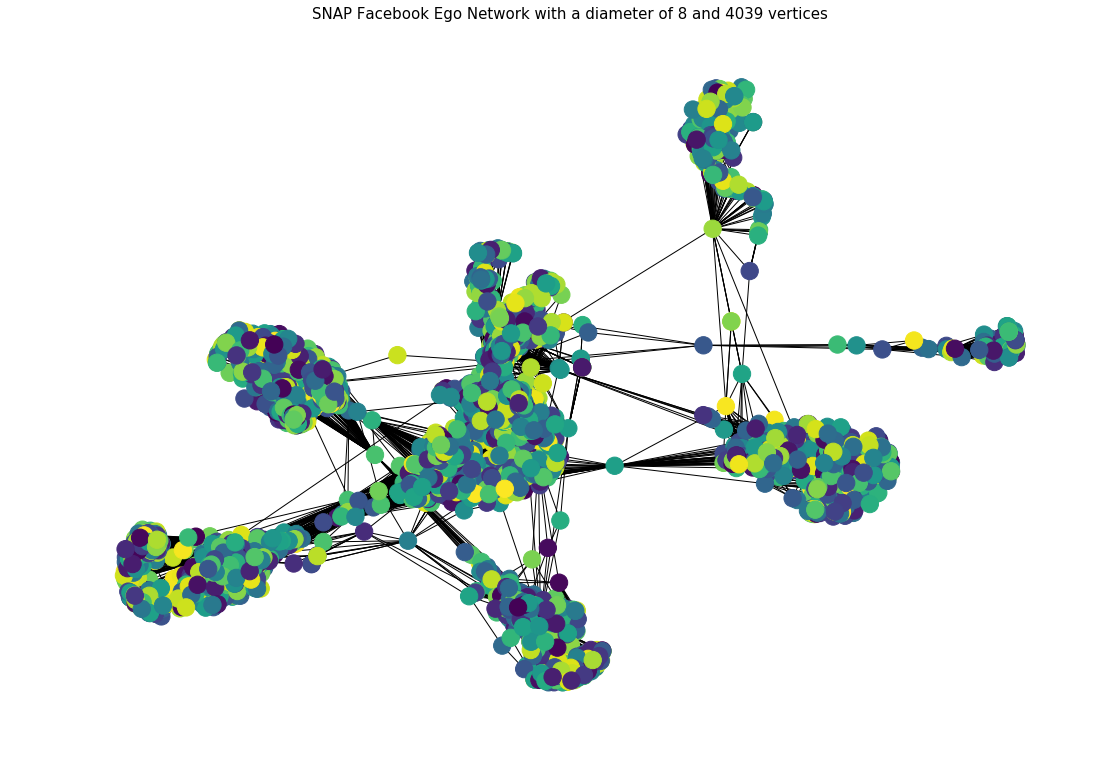

In [50]:
vertex_colors = np.random.rand(n)
plt.figure(figsize=(15,10))
nx.draw_spring(G,node_color = vertex_colors)
plt.title('SNAP Facebook Ego Network with a diameter of %d and %d vertices' %(d,n),fontsize=15)
plt.show()

In the social network above, the diameter is 8 and the number of people in the social network is 4039. Although the $G(n,p)$ random graph model has the property of a small diameter, social networks have a property not found in the $G(n,p)$. Social networks tend to have a higher clustering coefficient[4] than $G(n,p)$ model. The clustering cofficient captures the notion of triad closures. In simple terms, your friends are probably friends with your other friends. Other random graph models such as the Watts-Strogatz have been proposed to deal with this problem of clustering coefficient [5].

### References:
1. Erdős and A. Rényi, On Random Graphs, Publ. Math. 6, 290 (1959).
2. Gilbert, Random Graphs, Ann. Math. Stat., 30, 1141 (1959).
3. Milgram, Stanley (May 1967). "The Small World Problem". Psychology Today. Ziff-Davis Publishing Company.
4. M. Chiang, Networked Life: 20 Questions and Answers, Cambridge University Press, August 2012. 
5. Watts, D. J.; Strogatz, S. H. (1998). "Collective dynamics of 'small-world' networks" (PDF). Nature. 393 (6684): 440–442.
6. Jackson, Matthew O. Social and economic networks. Princeton university press, 2010.

In [42]:
len(G.nodes())

4039